# **Book Recommendation System**

In [5]:
# Frameworks

# Data modeling
import pandas as pd # Data
import numpy as np # Matrices

# Graphical analysis
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Adjustments in pandas
pd.set_option('display.max_rows', 100 ) # Lines
pd.set_option('display.max_columns', 50 ) # Columns
 
# Adjustments in matplot
plt.rcParams['figure.figsize'] = (15, 6)  # Chart size
plt.style.use('seaborn-darkgrid') # Chart style

# Data Import

In [7]:
# Reading data
book_data = pd.read_csv('../resource/.books-data/Books.csv')
rating_data = pd.read_csv('../resource/.books-data/Ratings.csv')
user_data = pd.read_csv('../resource/.books-data/Users.csv')

# Dimensçao [ Linhas, Colunas ]
book_data.shape, rating_data.shape, user_data.shape

((271360, 8), (1149780, 3), (278858, 3))

In [8]:
# Book data head
book_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [9]:
# Info
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [10]:
# Ratings book head data
rating_data.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [11]:
# Rating info
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [12]:
# User books info
user_data.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [13]:
# User data info
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


# Data Crossing

In [14]:
# First Crossing
book_rating = book_data.merge(rating_data, how='inner', on='ISBN')

# Second Crossing
data = book_rating.merge(user_data, how='inner', on='User-ID')

# Shape
data.shape

(1031136, 12)

In [15]:
# Data head
data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",NaN
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",NaN


In [16]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031136 non-null  object 
 1   Book-Title           1031136 non-null  object 
 2   Book-Author          1031135 non-null  object 
 3   Year-Of-Publication  1031136 non-null  object 
 4   Publisher            1031134 non-null  object 
 5   Image-URL-S          1031136 non-null  object 
 6   Image-URL-M          1031136 non-null  object 
 7   Image-URL-L          1031132 non-null  object 
 8   User-ID              1031136 non-null  int64  
 9   Book-Rating          1031136 non-null  int64  
 10  Location             1031136 non-null  object 
 11  Age                  753301 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 102.3+ MB


# Data modeling

In [69]:
# Fixing the corrupted publication year

for year in data['Year-Of-Publication'].value_counts().index :
    if(type(year) is str and year.isnumeric() == False):      
        for corrupted_year in data.loc[data['Year-Of-Publication'] == year].index:
            data.iloc[corrupted_year, 3] = ''



# Convert year column from string to numeric
data['Year-Of-Publication'] = pd.to_numeric(data['Year-Of-Publication'])

In [107]:
# Split text

# Extract the name of the country in the location column
def get_country( location ):
  arr = location.split(',')
  return arr[-1].upper()

# Create column country
data['Country'] = data['Location'].apply(get_country)

# New head
data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age,Pais,Country
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN,CANADA,CANADA
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,8,5,"timmins, ontario, canada",NaN,CANADA,CANADA
12,0887841740,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press,http://images.amazon.com/images/P/0887841740.0...,http://images.amazon.com/images/P/0887841740.0...,http://images.amazon.com/images/P/0887841740.0...,8,5,"timmins, ontario, canada",NaN,CANADA,CANADA
13,1552041778,Jane Doe,R. J. Kaiser,1999.0,Mira Books,http://images.amazon.com/images/P/1552041778.0...,http://images.amazon.com/images/P/1552041778.0...,http://images.amazon.com/images/P/1552041778.0...,8,5,"timmins, ontario, canada",NaN,CANADA,CANADA
15,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998.0,Brilliance Audio - Trade,http://images.amazon.com/images/P/1567407781.0...,http://images.amazon.com/images/P/1567407781.0...,http://images.amazon.com/images/P/1567407781.0...,8,6,"timmins, ontario, canada",NaN,CANADA,CANADA


# **Data Visualization**

In [73]:
# Describe visualization
data.describe()

,Year-Of-Publication,User-ID,Book-Rating,Age
count,1.031132e+06,1.031136e+06,1.031136e+06,753301.000000
mean,1.968195e+03,1.405945e+05,2.839051e+00,37.397648
std,2.311015e+02,8.052466e+04,3.854157e+00,14.098254
min,0.000000e+00,2.000000e+00,0.000000e+00,0.000000
25%,1.992000e+03,7.041500e+04,0.000000e+00,28.000000
50%,1.997000e+03,1.412100e+05,0.000000e+00,35.000000
75%,2.001000e+03,2.114260e+05,7.000000e+00,45.000000
max,2.050000e+03,2.788540e+05,1.000000e+01,244.000000


In [75]:
# Remove ratings zero
data = data.loc[data['Book-Rating'] > 0]

# Show
data.isnull().sum(), data.shape

(ISBN                        0
 Book-Title                  0
 Book-Author                 1
 Year-Of-Publication         1
 Publisher                   2
 Image-URL-S                 0
 Image-URL-M                 0
 Image-URL-L                 1
 User-ID                     0
 Book-Rating                 0
 Location                    0
 Age                    114221
 Pais                        0
 dtype: int64,
 (383842, 13))

<AxesSubplot: title={'center': 'Charts Analysis'}, xlabel='Book-Rating'>

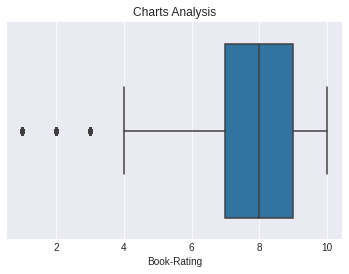

In [76]:
# Charts analysis
plt.title('Charts Analysis')
sns.boxplot(data=data, x='Book-Rating')

In [89]:
# Analysis
analysis = data.groupby( by=['Book-Title'] ).agg(
    Count = ('Book-Title', 'count'),
    Mean = ('Book-Rating', 'mean'),
    Max = ('Book-Rating', 'max'),
    Min = ('Book-Rating', 'min'),
    Median = ('Book-Rating', 'median'),
)

# Show
analysis.head()

,Count,Mean,Max,Min,Median
Book-Title,,,,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",1,9.000000,9,9,9.0
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1,8.000000,8,8,8.0
Dark Justice,1,10.000000,10,10,10.0
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",7,7.142857,10,1,7.0
Final Fantasy Anthology: Official Strategy Guide (Brady Games),2,10.000000,10,10,10.0


In [83]:
# Desc sort
analysis.sort_values('Count', ascending=False).head()

,Count,Mean,Max,Min,Median
Book-Title,,,,,
The Lovely Bones: A Novel,707,8.185290,10,1,8.0
Wild Animus,581,4.390706,10,1,4.0
The Da Vinci Code,494,8.439271,10,1,9.0
The Secret Life of Bees,406,8.477833,10,2,9.0
The Nanny Diaries: A Novel,393,7.437659,10,1,8.0


In [90]:
# Analisys Count x Rating

px.scatter(
    data_frame=analysis,
    x='Count', y='Mean',
    title='Count x Mean',
)

In [91]:
# Correlation
analysis.corr()

,Count,Mean,Max,Min,Median
Count,1.000000,0.018880,0.175572,-0.251497,0.036604
Mean,0.018880,1.000000,0.889722,0.842385,0.989839
Max,0.175572,0.889722,1.000000,0.530760,0.887792
Min,-0.251497,0.842385,0.530760,1.000000,0.804023
Median,0.036604,0.989839,0.887792,0.804023,1.000000


In [93]:
# Group by count
def classification_quantity(quantity):
  if int(quantity) <= 5:
    return '1-5 ratings'
  elif int(quantity) <=10:
    return '6-10 ratings'
  elif int(quantity) <= 50:
    return '11-50 ratings'
  elif int(quantity) <= 100:
    return '51-100 ratings'
  else:
    return '>101 ratings'


circular_chat = analysis['Count'].apply(classification_quantity).value_counts(normalize=True)

# DataFrame to transform
circular_chat = pd.DataFrame(circular_chat).reset_index()

# Plot
px.pie( 
    data_frame=circular_chat,
    names='index', values='Count',
    title='Division of Quantities'
)

In [96]:
# Analysis by year
analysis_year = data['Year-Of-Publication'].value_counts().sort_index().reset_index()

# Show
analysis_year.head()

,index,Year-Of-Publication
0,0.0,5783
1,1376.0,1
2,1378.0,1
3,1806.0,1
4,1900.0,1


<BarContainer object of 20 artists>

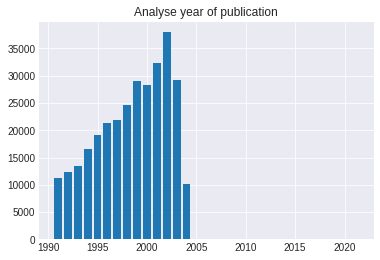

In [101]:
# Plot

filter = analysis_year.loc[(analysis_year['index'] > 1990) & (analysis_year['index'] < 2023)]

plt.title("Analyse year of publication")
plt.bar(filter['index'], filter['Year-Of-Publication'])

In [104]:
# Authors Ratings
data.groupby( by='Book-Author' ).agg(
    Quantity = ('Book-Rating', 'count'),
    Mean = ('Book-Rating', 'mean'),
).sort_values('Quantity', ascending=False ).head(10)

,Quantity,Mean
Book-Author,,
Stephen King,4639,7.815046
Nora Roberts,2938,7.629680
John Grisham,2550,7.523137
James Patterson,2387,7.697947
J. K. Rowling,1746,8.970218
Mary Higgins Clark,1677,7.503280
Janet Evanovich,1490,7.944966
Dean R. Koontz,1475,7.572203
Anne Rice,1245,7.387952


In [109]:
# Rating concentration
data['Country'].value_counts( normalize=True ).head(10) * 100

 USA               68.378135
 CANADA             9.267876
 UNITED KINGDOM     3.854190
 GERMANY            3.165625
                    2.737845
 SPAIN              1.874990
 AUSTRALIA          1.821322
 N/A                1.811943
 FRANCE             1.207789
 PORTUGAL           0.897505
Name: Country, dtype: float64

In [110]:
# Rating concentration
data['Country'].value_counts( normalize=True ).cumsum().head(10) * 100

 USA               68.378135
 CANADA            77.646011
 UNITED KINGDOM    81.500201
 GERMANY           84.665826
                   87.403671
 SPAIN             89.278662
 AUSTRALIA         91.099984
 N/A               92.911927
 FRANCE            94.119716
 PORTUGAL          95.017221
Name: Country, dtype: float64

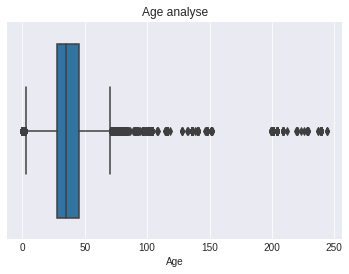

In [113]:
# Age
plt.title('Age analyse')
sns.boxplot(data=data, x='Age');

# **Model Construction**